#  TP 3: 

### 14 avril 2024

### Par Samuel Fortin, Philippe Truchon et Benjamin Trudel

## TP3.1 Mécanique céleste - la Terre

### a)

Utilisez la m´ethode de Verlet pour calculer l’orbite de la Terre autour du soleil, consid´erant
que le mouvement est d´ecrit par

$\frac{d^2r}{dt^2} = -GM \frac{r}{r^3}$

et sachant que la distance du périhélie est de 1.4710×1011 m et que la vitesse tangentielle
à cette position est de 3.0287 × 104 m/s (utilisez le module astropy pour les autres
constantes nécessaires). Utilisez un incrément temporel h = 1 heure. Représentez graphiquement
plusieurs orbites, qui devraient appaître légèrement non-circulaires.

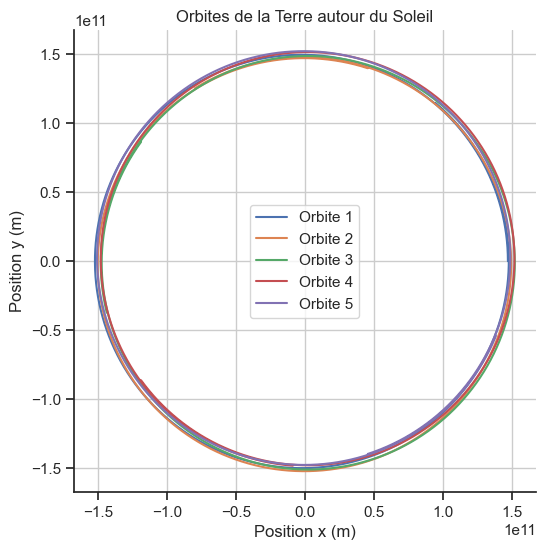

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from astropy import constants as const

sns.set_theme(style="ticks", palette="deep")

plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False


# Constantes
G = const.G.value  # Constante gravitationnelle
M = const.M_sun.value  # Masse du Soleil

# Fonction d'accélération
def acceleration(r):
    return -G * M * r / np.linalg.norm(r)**3

# Méthode de Verlet
def verlet_method(r0, v0, dt, steps):
    r = r0
    v = v0
    positions = [r0]
    
    for _ in range(steps):
        k = acceleration(r)
        r_half = r + 0.5 * v * dt
        v_new = v + k * dt
        r_new = r_half + 0.5 * v_new * dt
        positions.append(r_new)
        r = r_new
        v = v_new
        
    return np.array(positions)

# Paramètres de simulation
dt = 3600  # 1 heure en secondes
num_steps = 10000  # Nombre de pas de temps

# Conditions initiales pour différentes orbites
r_perihelion = 1.4710e11  # m
v_perihelion = 3.0287e4  # m/s
num_orbits = 5  # Nombre d'orbites à tracer

# Plot de plusieurs orbites
plt.figure(figsize=(8, 6))
for i in range(num_orbits):
    # Décalage de l'angle initial pour chaque orbite
    theta_shift = 2 * np.pi * i / num_orbits
    # Conditions initiales pour cette orbite
    r0 = np.array([r_perihelion * np.cos(theta_shift), r_perihelion * np.sin(theta_shift)])
    v0 = np.array([-v_perihelion * np.sin(theta_shift), v_perihelion * np.cos(theta_shift)])
    # Calcul de l'orbite
    orbit = verlet_method(r0, v0, dt, num_steps)
    # Plot de l'orbite
    plt.plot(orbit[:, 0], orbit[:, 1], label=f'Orbite {i+1}')

plt.xlabel('Position x (m)')
plt.ylabel('Position y (m)')
plt.title('Orbites de la Terre autour du Soleil')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.legend()
plt.show()

Figure 1: 

### b)

Modifiez votre programme pour qu’il calcule aussi l’énergie potentielle $-GMm/r$ et
cinétique $\frac{1}{2}mv^2$ à chaque pas, ainsi que la somme (énergie totale) de ces deux quantitées.
Rapportez ces valeurs en fonction du temps dans un graphique et commentez.

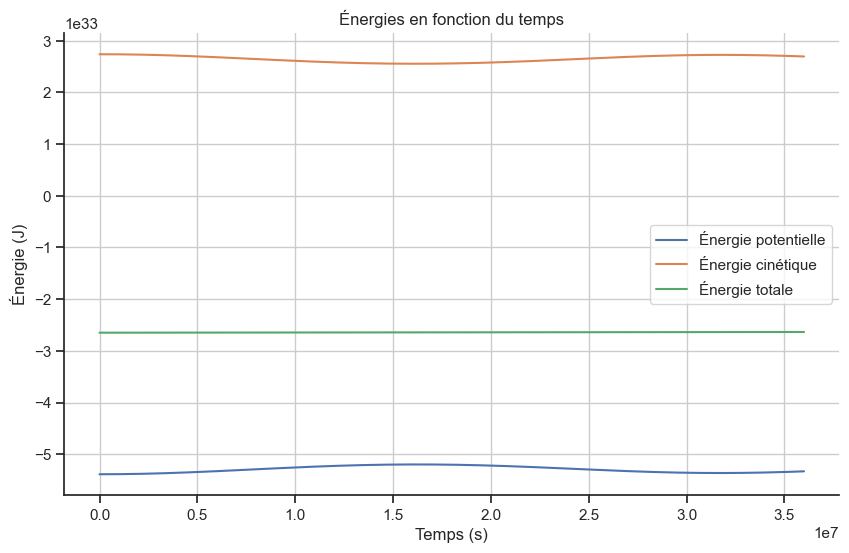

In [31]:
m = const.M_earth.value  # Masse de la Terre

# Calcul de l'énergie potentielle
def potential_energy(r):
    return -G * M * m / np.linalg.norm(r)

# Calcul de l'énergie cinétique
def kinetic_energy(v):
    return 0.5 * m * np.linalg.norm(v)**2

# Calcul de l'énergie totale (somme de l'énergie potentielle et de l'énergie cinétique)
def total_energy(potential_energy, kinetic_energy):
    return potential_energy + kinetic_energy

def verlet_method_with_energy(r0, v0, dt, steps):
    r = r0
    v = v0
    positions = [r0]
    potential_energy_values = [potential_energy(r0)]  # Stocker l'énergie potentielle initiale
    kinetic_energy_values = [kinetic_energy(v0)]  # Stocker l'énergie cinétique initiale
    total_energy_values = [total_energy(potential_energy_values[0], kinetic_energy_values[0])]  # Stocker l'énergie totale initiale
    
    for _ in range(steps):
        k = acceleration(r)
        r_half = r + 0.5 * v * dt
        v_new = v + k * dt
        r_new = r_half + 0.5 * v_new * dt
        positions.append(r_new)
        
        # Calcul des énergies à chaque pas de temps et les stocker dans les listes correspondantes
        potential_energy_values.append(potential_energy(r_new))
        kinetic_energy_values.append(kinetic_energy(v_new))
        total_energy_values.append(total_energy(potential_energy_values[-1], kinetic_energy_values[-1]))
        
        r = r_new
        v = v_new
        
    return np.array(positions), np.array(potential_energy_values), np.array(kinetic_energy_values), np.array(total_energy_values)

# Appel de la fonction verlet_method_with_energy pour obtenir les valeurs des énergies
orbit, potential_energy_values, kinetic_energy_values, total_energy_values = verlet_method_with_energy(r0, v0, dt, num_steps)

# Plot des énergies en fonction du temps
time_values = np.arange(num_steps + 1) * dt
plt.figure(figsize=(10, 6))
plt.plot(time_values, potential_energy_values, label='Énergie potentielle')
plt.plot(time_values, kinetic_energy_values, label='Énergie cinétique')
plt.plot(time_values, total_energy_values, label='Énergie totale')
plt.xlabel('Temps (s)')
plt.ylabel('Énergie (J)')
plt.title('Énergies en fonction du temps')
plt.legend()
plt.grid(True)
plt.show()

Figure 2: Comme on peut le voir sur ce graphique, l'énergie cinétique est positive, l'énergie potentielle est négative et la somme des deux est elle aussi négative et constante. Le fait que cette somme des énergie soit négative et aussi constante nous permet de confirmer que la terre est bel et bien en orbite stable autour du soleil. En effet, une énergie cinétique supérieure à l'énergie potentielle engendrerait la sortie d'orbite de la terre.

### c)

Utilisez maintenant la méthode d’Euler, RK2 et RK4 pour calculer l’orbite de la Terre
et l’énergie totale en fonction du temps, que vous rapportez sur le même graphique que
l’énergie totale en fonction du temps calculée par la méthode de Verlet. Votre graphique
devrait montrer le caractère symplectique de la méthode de Verlet vs Euler/RK2/RK4.

### d)

Utilisez maintenant la méthode de Bulirsch-Stoer pour calculer l’orbite de la Terre,
avec une précision de 1 km par année (voir l’exemple 8.7 dans le Newman pour une
implémentation, que vous pouvez réutiliser). Utilisez un intervalle H de une semaine.
Comparez avec la précision obtenue avec les autres méthodes.

## TP3.2 Mécanique céleste - Mars

### e)

Utilisez Bulirsch-Stoer pour calculer la position de Mars 203 jours plus tard, soit le 18
février 2021 (jour de l’atterrissage). Ne lésinez pas sur la précision, ¸ca coûte cher un
astromobile. Notez que les calculs seront effectués en trois dimensions. Comparez votre
position calculée à la valeur de l’éphéméride, soit
eph.position(’mars’,atterissage.jd). Commentez, notamment sur vos limites et
celles de la méthode utilisée, peut-être en vous inspirant d’informations à cette adresse$^1$.

1.https://en.wikipedia.org/wiki/Jet_Propulsion_Laboratory_Development_Ephemeris

### f)

Quelle méthode numérique la NASA utilise-t-elle pour envoyer des sondes vers Mars ?

### g)

Cette méthode est-elle en cause dans la perte du Mars Climate Orbiter en 1999 ? Si non,
quelle a été la cause de cette perte ?

### h)

Ecrivez un programme pour calculer les valeurs des coefficients $b_k$, qui peuvent de façon
pratique être séparés en composantes réelles et imaginaires $(b_k = α_k + iη_k)$. Divisez la
boîte en N = 1000 tranches et créez deux conteneurs pour les parties rélles et imaginaires
de $\psi(x_n, 0)$ à chaque point de la grille. Effectuez une transformée en sinus pour chaque
conteneur séparément, i.e. calculez les valeurs de $α_k$ et $β_k$ pour k = 1...N − 1. Vous
utiliserez les fonctions du module dcst de Newman (Appendix E ou son site web).

### i)

Expliquez pourquoi Newman s’en remet à la fonction rfft de numpy pour calculer la
transformée en sinus.

### j)

En injectant $b_k = α_k + iη_k$ dans la solution et en prenant la partie réelle, nous obtenons

$Re\psi(x_n, t) = \frac{1}{N}\sum_{k=1}^{N-1} \bigg[ \alpha_k cos \bigg( \frac{\pi^2\hbar k^2}{2ML^2}t \bigg) -\eta_k sin \bigg( \frac{\pi^2\hbar k^2}{2ML^2}t \bigg) \bigg] sin \bigg( \frac{\pi k n}{N} \bigg)$

pour la partie réelle de la fonction d’onde.
Une inspection vous convaincra qu’il s’agit de l’inverse d’une transformée en sinus pour
la quantité entre crochets. Complétez votre programme pour qu’il calcule la partie réelle
de $\psi(x_n, t)$ pour un t arbitraire à l’aide de la fonction idst fournie par Newman. Testez
votre programme en illustrant la fonction d’onde à t = 10−16 s.

### k)

Maintenant que tout est en place, vous pouvez produire une animation de l’évolution de
la fonction d’onde (normalisée) au cours du temps, en générant une image à plusieurs t
(utilisez un incrément de 10−18 s). Il y a probablement plusieurs façons d’y arriver, l’une
d’elle étant le package visual. Prenez soin d’ajuster le taux de rafraîchissement et les
échelles pour bien apprécier la dynamique de la fonction d’onde.

### l)

Laissez tourner votre animation un moment et décrivez ce que vous observez, en utilisant
bien entendu un langage se rapportant à la physique du problème.